# Stacking
Stacking (Stacked Generalization) is an ensemble learning method where predictions from multiple base models (level-0 models) are used as inputs to a meta-model (level-1 model). The meta-model learns how to best combine the base models' predictions to improve overall performance.

In stacking, base models can be of different types (e.g., decision trees, logistic regression, SVM, etc.), and the meta-model is often a simpler model (e.g., linear regression) that takes the predictions of the base models as features.

Stacking Classifier:
Accuracy: 0.95
Confusion Matrix:
 [[ 7  0]
 [ 1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



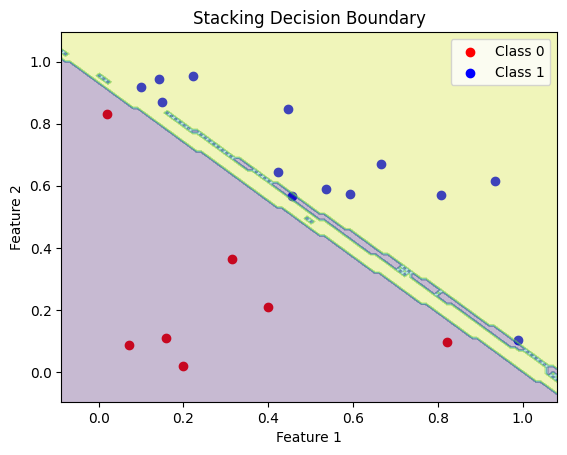

In [1]:
# Stacking Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define base classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = SVC(kernel='linear', probability=True, random_state=0)  # Enable probability=True for stacking
clf3 = DecisionTreeClassifier(random_state=0)

# Define the meta-classifier (e.g., Logistic Regression)
meta_clf = RandomForestClassifier(random_state=0)

# Create a Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('lr', clf1), ('svc', clf2), ('dt', clf3)],
    final_estimator=meta_clf,  # The meta-model
    cv=5  # Cross-validation for blending
)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Predict using the Stacking Classifier
y_pred = stacking_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Stacking Classifier:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the decision boundary
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = stacking_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('Stacking Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Explanation of Code Components

1. **Data Generation**: Synthetic binary classification data is created, where points are classified based on the sum of two features.

2. **Base Models**:
   - **Logistic Regression** (`clf1`)
   - **Support Vector Classifier** (`clf2`), with `probability=True` for probability estimates
   - **Decision Tree** (`clf3`)

3. **Meta-Model**: A **Random Forest Classifier** (`meta_clf`) is used as the meta-model to combine the predictions of the base classifiers.

4. **Stacking Classifier**:
   - **Base Estimators**: The three classifiers (`clf1`, `clf2`, `clf3`).
   - **Final Estimator**: The meta-model (`meta_clf`).
   - **Cross-validation** (`cv=5`): Ensures that the meta-model is trained on out-of-fold predictions of the base models.

5. **Prediction**: The `predict` method is used to generate predictions on the test data.

6. **Model Evaluation**:
   - **Accuracy**: The proportion of correctly classified instances.
   - **Confusion Matrix**: A table used to describe the performance of the classification model.
   - **Classification Report**: Includes precision, recall, and F1-score for each class.

7. **Visualization**: The decision boundary for the stacking classifier is plotted using a contour plot to visualize the predictions.

### Key Points of Stacking

- **Diverse Base Models**: The base models are usually diverse to capture different aspects of the data.
- **Meta-Model**: The meta-model learns from the predictions of the base models and usually is a simple model like Logistic Regression, but in this case, we used a Random Forest for greater flexibility.
- **Cross-Validation**: During training, cross-validation is used to generate predictions for the meta-model in a way that prevents data leakage from the training set.

### Stacking vs. Other Ensemble Methods
- **Bagging**: In bagging (e.g., Random Forest), multiple instances of the same model are trained on bootstrapped samples. Stacking uses different models and combines their predictions.
- **Boosting**: Boosting focuses on correcting the mistakes of previous models by giving higher weights to misclassified instances. Stacking learns how to combine different models' predictions without focusing on instance weighting.